Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

A problem that prefers using a decision tree over the random forest is the prediction of street plowing during the snow season. When deciding when to plow what street, we must interpret and explain the prediction as to why one road must be plowed first over the other. This is important because, in urban areas, some locations must be plowed first to enable accessibility for the majority of the population. If we cannot interpret the reason or explain the prediction, there will be consequences among the population. Unlike decision trees, using the random forest method can cause issues because, in the real world, the most efficient way (higher score) of plowing streets doesn't always equal the best course of plowing the road.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

A preferred use of random forest over decision tree is for urban planning. We want the highest average/result when planning spaces and buildings for specific use. Because there are many outliers in urban data, random forests can increase the score when placing special buildings and structures (Parking space, landmarks, transportation stations, etc.) In this case, accuracy is more critical than interpretability.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

We can increase interpretability for the random forest by computing feature importances - this can be done by computing the amount of impurity (Gini coefficient). This allows an insight into what variable is causing the most impact. The issue with computing feature importance is that it is too static, meaning even if we know the variable, no other information can be understood from it. And feature importance does not provide insight into an individual decision tree. <br> Another way is Domingo's CMM (Combining multiple models). Essentially, CMM is used to maintain relatively high accuracy while keeping stability (interpretability). Doming's work uses an artificial training set with the original set and is evaluated through the C4.5 Rules (pseudocode on the meta-learning algorithm) as the base learner. It also uses bagging as the multiple-model methodology. Combining bagging and C4.5 Rules, it allows CMM to achieve an average over 60% accuracy while maintaining stability.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
# your code here
df['MPG'].mode()

0    bad
dtype: object

In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [5]:
# your code here
# Cylinders
def discreteV(variable, value):
    goodY = badY = goodN = badN = 0
    for i in df.index:
        if(df[variable][i] == value):
            if(df['MPG'][i] == "good"):
                goodY = goodY + 1
            else:
                badY = badY + 1    
        elif(df[variable][i] != value):
            if(df['MPG'][i] == "good"):
                goodN = goodN + 1
            else:
                badN = badN + 1
    return goodY, badY, goodN, badN

In [6]:
resultData = pd.DataFrame(columns=['Split', 'Group Y', 'Group N', 'Information Gain'])

goodY, badY, goodN, badN = discreteV("cylinders",4)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'Cylinder = 4',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = discreteV("cylinders",6)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'Cylinder = 6',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = discreteV("cylinders",8)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'Cylinder = 8',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

resultData

,Split,Group Y,Group N,Information Gain
0,Cylinder = 4,5+/4-,0+/11-,0.365294
1,Cylinder = 6,0+/6-,5+/9-,0.153078
2,Cylinder = 8,0+/5-,5+/10-,0.122556


In [7]:
goodY, badY, goodN, badN = discreteV("weight","light")
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'Weight = Light',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = discreteV("weight","medium")
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'Weight = Medium',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = discreteV("weight","weighty")
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'Weight = Heavy',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

resultData

,Split,Group Y,Group N,Information Gain
0,Cylinder = 4,5+/4-,0+/11-,0.365294
1,Cylinder = 6,0+/6-,5+/9-,0.153078
2,Cylinder = 8,0+/5-,5+/10-,0.122556
3,Weight = Light,3+/3-,2+/12-,0.097107
4,Weight = Medium,2+/6-,3+/9-,0.000000
5,Weight = Heavy,0+/6-,5+/9-,0.153078


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [8]:
# your code here
def realV(variable, value):
    goodY = badY = goodN = badN = 0
    for i in df.index:
        if(df[variable][i] > value):
            if(df['MPG'][i] == "good"):
                goodY = goodY + 1
            else:
                badY = badY + 1    
        elif(df[variable][i] <= value):
            if(df['MPG'][i] == "good"):
                goodN = goodN + 1
            else:
                badN = badN + 1
    return goodY, badY, goodN, badN

In [9]:
goodY, badY, goodN, badN = realV("HP",78)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 78',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",87)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 87',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",89.5)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 89.5',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",91)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 91',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",93.5)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 93.5',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

resultData

,Split,Group Y,Group N,Information Gain
0,Cylinder = 4,5+/4-,0+/11-,0.365294
1,Cylinder = 6,0+/6-,5+/9-,0.153078
2,Cylinder = 8,0+/5-,5+/10-,0.122556
3,Weight = Light,3+/3-,2+/12-,0.097107
4,Weight = Medium,2+/6-,3+/9-,0.000000
5,Weight = Heavy,0+/6-,5+/9-,0.153078
6,HP > 78,3+/15-,2+/0-,0.226258
7,HP > 87,2+/14-,3+/1-,0.214171
8,HP > 89.5,1+/14-,4+/1-,0.365777
9,HP > 91,1+/13-,4+/2-,0.275927


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

From the results above, the optimal split is create at node HP > 93.5 with the highest information gain of 0.4295. We can further partition the highest information gain, so HP > 93.5. We would ask the question by using the highest information gain of each category.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [10]:
# your code here
df = df[df["HP"] <= 93.5]
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light
19,bad,4,93,light


In [11]:
resultData = pd.DataFrame(columns=['Split', 'Group Y', 'Group N', 'Information Gain'])

goodY, badY, goodN, badN = discreteV("cylinders",4)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'Cylinder = 4',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = discreteV("weight","light")
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'Weight = Light',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",78)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 78',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",87)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 87',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",89.5)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 89.5',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",91)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 91',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

In [12]:
resultData

,Split,Group Y,Group N,Information Gain
0,Cylinder = 4,5+/1-,0+/2-,0.466917
1,Weight = Light,3+/1-,2+/2-,0.048795
2,HP > 78,3+/3-,2+/0-,0.204434
3,HP > 87,2+/2-,3+/1-,0.048795
4,HP > 89.5,1+/2-,4+/1-,0.158868
5,HP > 91,1+/1-,4+/2-,0.015712


In [13]:
df = df[df['HP'] <= 93.5]
df = df[df['cylinders'] == 4]
df

,MPG,cylinders,HP,weight
0,good,4,75,light
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
17,good,4,81,light
19,bad,4,93,light


In [14]:
resultData = pd.DataFrame(columns=['Split', 'Group Y', 'Group N', 'Information Gain'])

goodY, badY, goodN, badN = realV("HP",78)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 78',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

goodY, badY, goodN, badN = realV("HP",89.5)
ig = InformationGain(goodY,badY,goodN,badN)
resultData = resultData.append({'Split': 'HP > 89.5',
                                'Group Y': str(goodY) + '+/' + str(badY) + '-',
                                'Group N': str(goodN) + '+/' + str(badN) + '-',
                                'Information Gain': ig                               
                               }, ignore_index=True)

In [15]:
resultData

,Split,Group Y,Group N,Information Gain
0,HP > 78,3+/1-,2+/0-,0.109170
1,HP > 89.5,1+/1-,4+/0-,0.316689


In [16]:
df = df[df['HP'] <= 93.5]
df = df[df['cylinders'] == 4]
df = df[df['HP'] <= 89.5]
df

,MPG,cylinders,HP,weight
0,good,4,75,light
14,good,4,89,medium
15,good,4,65,light
17,good,4,81,light


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

In [17]:
# HP > 93.5?
# --> Yes:
#     Predict {0 Good, 12 Bad}
# --> No:
#     Cylinders = 4?
#     --> Yes:
#         HP > 89.5?
#         --> Yes:
#             Predict {4 Good, 0 Bad}
#         --> No:
#             Predict {0 Good, 1 Bad}
#     --> No:
#         Predict {0 Good, 2 Bad}

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

???,4,95,light

???,6,113,medium

???,4,83,weighty

???,6,70,weighty


95 is NOT greater than 95.5. <br> Cylinders does equal 4. <br> HP is greater than 89.5. <br>
Therefore, "Good"

113 is greater than 95.5. <br>
Therefore, "Bad"

70 is NOT greater than 95.5. <br> Cylinders does NOT equal 4. <br>
Therefore, "Bad"

### Question 3, Predicting burden of disease （40 pts)

In [18]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(5)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high
3,Angola,0.2,0.63,14009,0.39604,0.69307,0.158420,0.55446,0.028,0.842,0.0670,22,1942,0.66139,0.53267,awful
4,Armenia,1.0,2.51,2780,0.79208,0.98020,0.603960,0.95050,0.060,0.202,0.1720,11,5697,0.97624,0.97030,low


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [19]:
# your code here
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
data=data.dropna()

# Target --> "low", "medium", "high", and "awful"
y = data.loc[:,"BurdenOfDisease"]

# Feature Space
X = data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]
X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
# What would our accuracy be if we predicted 0 (no weapon found) for everyone?
print(1.*len(y_test[y_test=="awful"])/len(y_test))

0.15384615384615385


In [21]:
result_os = []
for i in range(2, 100, 5):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    result_os.append([i, dt.score(X_test,y_test)])
    
result_df = pd.DataFrame(result_os, columns = ['Max Depth', 'Accuracy Score'])
result_df

,Max Depth,Accuracy Score
0,2,0.538462
1,7,0.641026
2,12,0.615385
3,17,0.615385
4,22,0.692308
5,27,0.615385
6,32,0.615385
7,37,0.641026
8,42,0.564103
9,47,0.615385


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

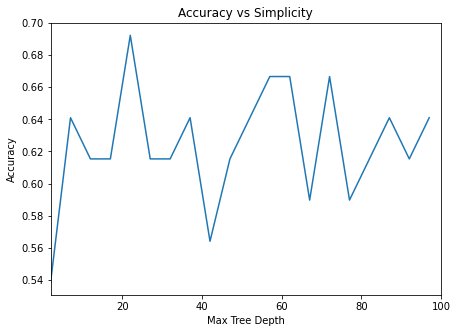

In [22]:
# your code here
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(2, 100, 5),result_df['Accuracy Score'])

plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Simplicity')

plt.xlim(2,100)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [23]:
# your code here
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test), multi_class='ovo'))

{'max_depth': 1}
0.6908369408369408


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10 pts)

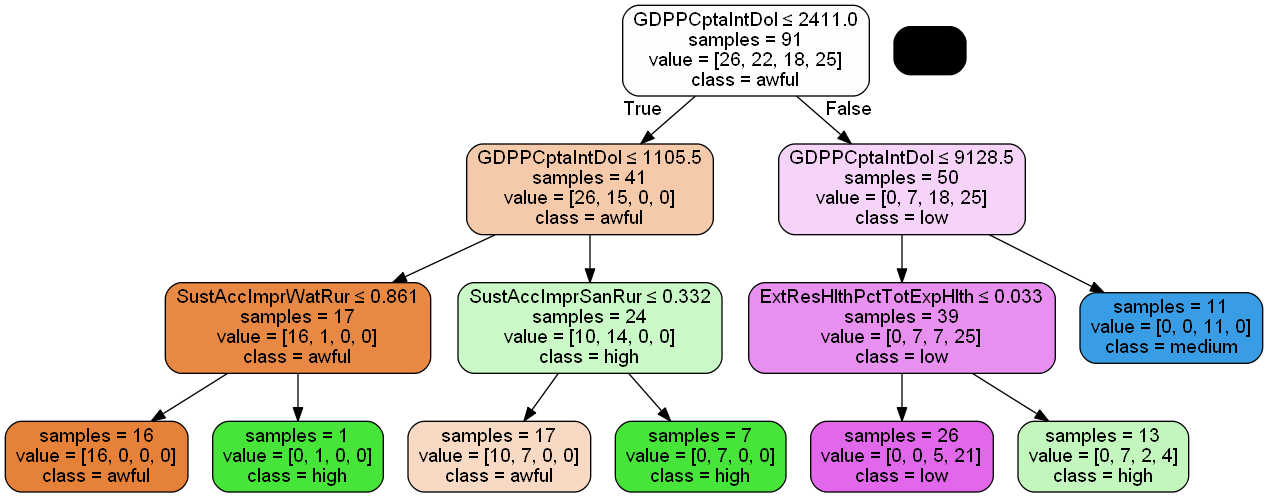

In [24]:
# your code here
from sklearn import tree
from IPython.display import Image  
import pydotplus

dt = DecisionTreeClassifier(max_depth=3) # just to keep it simple for visualization
dt.fit(X_train,y_train)

thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['awful','high','medium','low'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [25]:
# your code here
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':range(1,51,5)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)
print(rs.best_params_)
print(roc_auc_score(np.array(y_test),pred,multi_class='ovo'))

{'n_estimators': 1}
0.8007335257335259


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

The random forest performed higher than the decision tree in terms of accuracy score. But the downside to using random forest is the interpretability. It is much harder to interpret random forest than the decision tree. Especially having the ability to visualize the decision tree allows us "humans" to understand the outcome/result—the decision tree score is roughly 0.10 less than the random forest, but that is because of the random forest using multiple trees to get to the best result. Because of using multiple trees, the interpretability is much harder on random than on the decision tree.